# Part 4 

# Hands State Classification

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from sklearn.decomposition import PCA
import pandas.util.testing as tm
import pickle

##### We have three kinds of hands states, let's plot the correlation between the features of each state to see the difference.

In [73]:
alone = pd.read_csv('C:/Users/moria/Desktop/Data/Part 4/Training/Evyatar Cohen/Evyatar636771054555711409Alone.csv')
sync = pd.read_csv('C:/Users/moria/Desktop/Data/Part 4/Training/Evyatar Cohen//Evyatar636771053639929594Sync.csv')
spontan = pd.read_csv('C:/Users/moria/Desktop/Data/Part 4/Training/Evyatar Cohen//Evyatar636771052727603804Spontan.csv')

In [74]:
def show(situation):
    numeric_df = situation.drop([" Frame ID", " Hand Type", " # hands"], axis=1) 
    corr = numeric_df.corr()
    
    f = plt.figure(figsize=(10, 5))
    plt.matshow(corr, fignum=f.number)
    plt.xticks(range(numeric_df.shape[1]), numeric_df.columns, fontsize=10, rotation=80)
    plt.yticks(range(numeric_df.shape[1]), numeric_df.columns, fontsize=10)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=10)
    plt.show()

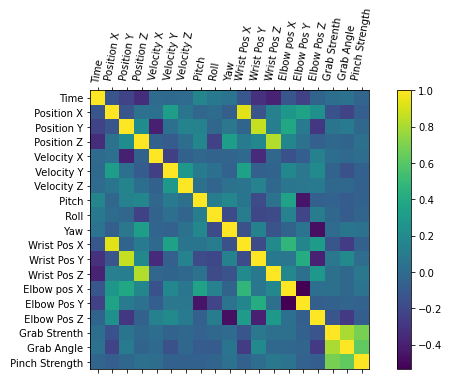

In [75]:
show(alone)

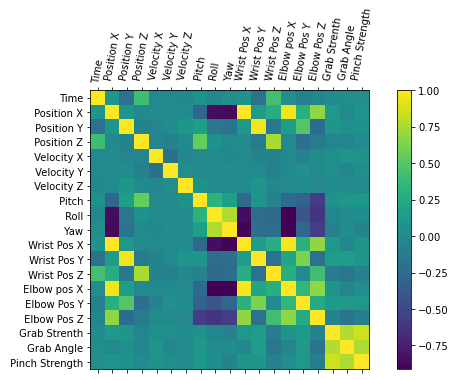

In [76]:
show(sync)

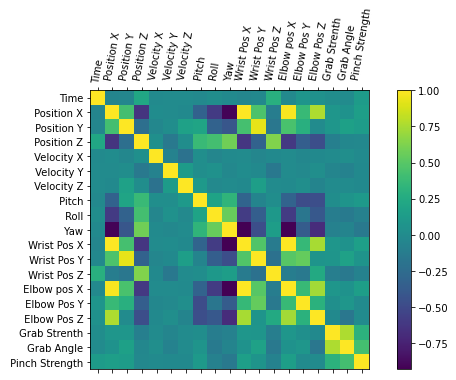

In [77]:
show(spontan)

## Data construction

In [78]:
def new_cols(l,i):
    new_cols = ["index"]
    
    for col in l:
            new_cols.append(col+str(i))
            
    return new_cols

In [79]:
def compress_data(df):
    df0 = df
    df1 = df
    df2 = df
    df3 = df
    df4 = df
    li = [df0, df1, df2, df3, df4]
    
    for i in range(0,5):
        li[i] = df[df.index%5==i].reset_index()
        
        if (i != 0):
            new_col = new_cols(list(df.columns), i)
            li[i].columns = new_col
            li[i] = li[i].drop(['Time'+str(i), ' Frame ID'+str(i), ' Hand Type'+str(i), ' # hands'+str(i), 'index'], axis=1)
    
    return pd.concat(li, axis=1).drop(['index'], axis=1)

In [80]:
def make_class(file):
    if 'Spontan' in file:
        state_type = 1
        
    if 'Sync' in file:
        state_type = 2
        
    if 'Alone'in file:
        state_type = 3
        
    return state_type

In [81]:
def construct_datasets(adress):
    files = glob.glob(adress)
    l = []

    for file in files:
        df = pd.read_csv(file, index_col=None, header=0)
        
        #ignor the first 7 seconds
        start_time = df["Time"].min()
        df = df[df["Time"]>start_time+7]
        
        #combine the rows 
        df = compress_data(df)
        
        #insert class label
        df['state'] = make_class(file)
        df['name'] = file.split("\\")[1]
        
        df["Time"] = df["Time"].astype("float")
        df["state"] = df["state"].astype("int")
        l.append(df)
        
    df = pd.concat(l, axis=0, ignore_index=True)
    return df

In [82]:
trainning = construct_datasets("C://Users/moria/Desktop/Data/Part 4/Training/*/*.csv")
trainning

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Wrist Pos Y4,Wrist Pos Z4,Elbow pos X4,Elbow Pos Y4,Elbow Pos Z4,Grab Strenth4,Grab Angle4,Pinch Strength4,state,name
0,71.44753,98076.0,left,2.0,-110.42230,231.4766,85.786140,0.774960,77.71951,-72.85492,...,167.4718,16.26752,312.2578,1.103906,142.78720,0.0,0.233833,0.0,1,Evyatar Cohen
1,71.48033,98080.0,right,2.0,139.30040,214.3510,-22.173040,16.260040,217.15190,272.25280,...,192.3551,51.94658,-346.5293,30.469920,24.87281,0.0,0.000000,0.0,1,Evyatar Cohen
2,71.53003,98086.0,left,2.0,-113.91830,249.2464,79.042270,-65.101010,277.79990,-91.00920,...,176.4954,24.22665,337.1487,-0.519946,106.73040,0.0,0.114437,0.0,1,Evyatar Cohen
3,71.56316,98090.0,right,2.0,144.09590,239.4014,5.308109,127.349900,352.48910,385.87170,...,205.7998,49.44250,-338.9432,34.909430,13.04626,0.0,0.082413,0.0,1,Evyatar Cohen
4,71.61286,98095.0,left,2.0,-116.08190,262.2935,69.381250,-41.952320,67.29385,-164.57100,...,190.4440,43.78187,344.2592,8.226139,108.72380,0.0,0.226765,0.0,1,Evyatar Cohen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60092,856.03030,67293.0,left,2.0,-75.83507,159.3587,-22.003090,-7.125214,148.76210,29.33295,...,152.7493,60.86682,342.2903,37.979910,160.02950,0.0,0.000000,0.0,2,Yoel Raz
60093,856.09640,67297.0,right,2.0,94.64355,196.8384,16.441640,6.618970,111.50540,97.14287,...,128.8997,32.45974,-337.7510,41.088100,118.57100,0.0,0.000000,0.0,2,Yoel Raz
60094,856.19650,67304.0,left,2.0,-77.62601,173.7391,-14.213500,-46.750000,99.50911,71.01207,...,150.2528,63.32611,318.3403,-1.043847,155.06500,0.0,0.000000,0.0,2,Yoel Raz
60095,856.26310,67309.0,right,2.0,101.91230,212.0264,42.535680,79.958100,113.41030,190.77140,...,129.5246,33.89856,-304.9600,-0.548136,142.01090,0.0,0.000000,0.0,2,Yoel Raz


## cleaning the data

In [83]:
trainning = trainning.dropna(axis=0).reset_index()

In [84]:
validation = construct_datasets(("C://Users/moria/Desktop/Data/Part 4/Validation/*/*.csv"))

In [85]:
validation = validation.dropna(axis=0).reset_index()

### labels signification 

| Situation | Number |
| --- | --- | 
| Spontan | 1 |
| Sync | 2 |
| Alone | 3 |

# Models

In [86]:
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix 

import warnings
warnings.filterwarnings("ignore")

In [87]:
#Shuffling the data
trainning = trainning.sample(frac=1).reset_index(drop=True)
trainning

,index,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,...,Wrist Pos Y4,Wrist Pos Z4,Elbow pos X4,Elbow Pos Y4,Elbow Pos Z4,Grab Strenth4,Grab Angle4,Pinch Strength4,state,name
0,58341,627.63930,47921.0,left,2.0,-73.94122,176.5378,17.192530,-62.809640,92.441600,...,156.97090,74.985110,323.2729,-42.476760,65.78860,0.000000,0.019357,0.000000,1,Yoel Raz
1,16924,80.98193,9404.0,right,2.0,90.31488,231.9020,82.022220,-2.042415,376.878300,...,194.76360,26.900340,-455.3988,7.429064,38.02134,0.000000,0.175781,0.000000,1,Oriya Social_Nuero
2,41736,490.03590,59046.0,right,2.0,162.59530,233.3803,25.954210,150.248700,17.418850,...,99.68063,37.107100,-258.9904,-132.224100,17.37165,0.246199,1.803030,0.346336,2,Shahar Terner
3,36784,570.47500,66440.0,left,2.0,-120.27730,183.1293,37.453340,-89.046300,-305.996900,...,181.64540,72.507740,-324.4996,40.908520,202.06700,0.000000,0.549089,0.000000,1,Revital Marbel
4,51497,745.50900,86321.0,left,2.0,-70.32764,237.4951,112.407300,-38.043710,471.558300,...,116.79780,116.534200,326.1548,-49.877410,201.15460,0.000000,0.051163,0.000000,2,Shelly Social_Nuero
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60053,2153,181.72760,110785.0,left,2.0,-102.34970,198.6262,59.888640,33.454880,295.750800,...,168.20710,29.667850,334.8218,39.270240,36.58475,0.000000,0.000000,0.000000,2,Evyatar Cohen
60054,10009,205.98520,24749.0,left,1.0,-65.92764,213.2727,49.099870,-45.069800,28.689120,...,170.70600,27.736660,-330.9601,19.785070,29.07849,0.000000,0.000000,0.000000,3,Nofar Social_Nuero
60055,38688,669.19580,77805.0,right,1.0,132.24810,124.5854,3.832911,106.040000,-82.219740,...,94.03645,5.742548,300.4946,-122.150300,55.97980,0.000000,0.490870,0.000000,2,Revital Marbel
60056,42203,509.36890,61275.0,left,2.0,-146.78710,160.4210,7.079649,71.593380,-4.269943,...,149.11070,25.884860,324.3619,-43.457310,78.77486,1.000000,2.381031,0.073195,2,Shahar Terner


In [88]:
from sklearn.model_selection import train_test_split

X = trainning.drop(['state', 'index', 'Time', ' Frame ID', ' Hand Type', ' # hands', 'name'], axis=1)
y = trainning['state']
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.33, random_state=42)

In [89]:
X_valid = validation.drop(['state', 'index', 'Time', ' Frame ID', ' Hand Type', ' # hands', 'name'], axis=1)
y_valid = validation['state']

In [90]:
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=10, shuffle=True)

In [91]:
def display_scores(scores):
    
    print("Mean Accuracy: {:.2f}%".format(scores.mean()*100))
    print("Standard deviation: {:.2f}%".format(scores.std()*100))

In [92]:
def fit_predict_valid(models, X_train, y_train, X_test, y_test, X_valid, y_valid):
    
    for model in models:
        model.fit(X_train, y_train)
        print()
        print(model.__class__.__name__ , "Accuracy: {:.2f}%" .format(model.score(X_test,y_test)*100), "\n")
        
        y_pred = model.predict(X_test)
        print(model.__class__.__name__, "Matrix: ")
        print(confusion_matrix(y_test, y_pred), "\n")
        print("Classification Report:\n", classification_report(y_test, y_pred))
        
        scores = cross_val_score(model, X_valid, y_valid, cv=kf)
        display_scores(scores)

## KNN and DecisionTree with validation 

In [93]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

In [94]:
from sklearn.tree import DecisionTreeClassifier

decisionTree = DecisionTreeClassifier()

In [97]:
models = [knn, decisionTree]

fit_predict_valid(models, X_train, y_train, X_test, y_test, X_valid, y_valid)


KNeighborsClassifier Accuracy: 89.94% 

KNeighborsClassifier Matrix: 
[[6621 1288   18]
 [ 646 7436   29]
 [  10    2 3770]] 

Classification Report:
               precision    recall  f1-score   support

           1       0.91      0.84      0.87      7927
           2       0.85      0.92      0.88      8111
           3       0.99      1.00      0.99      3782

    accuracy                           0.90     19820
   macro avg       0.92      0.92      0.92     19820
weighted avg       0.90      0.90      0.90     19820

Mean Accuracy: 93.68%
Standard deviation: 0.67%

DecisionTreeClassifier Accuracy: 91.38% 

DecisionTreeClassifier Matrix: 
[[7029  882   16]
 [ 752 7334   25]
 [  20   13 3749]] 

Classification Report:
               precision    recall  f1-score   support

           1       0.90      0.89      0.89      7927
           2       0.89      0.90      0.90      8111
           3       0.99      0.99      0.99      3782

    accuracy                           0.91  

# Ensemble learning 

## VotingClassifier (KNN and DecisionTree)

In [98]:
from sklearn.ensemble import VotingClassifier

voting_hard = VotingClassifier(estimators=[('decisionTree', decisionTree), ('knn', knn)], voting='hard')
voting_soft = VotingClassifier(estimators=[('decisionTree', decisionTree), ('knn', knn)], voting='soft')

## RandomForest 

In [99]:
from sklearn.ensemble import RandomForestClassifier

randomForest = RandomForestClassifier(n_estimators=200, max_leaf_nodes=16, n_jobs=-1)

## AdaBoost

In [100]:
from sklearn.ensemble import AdaBoostClassifier

adaBoost = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=200)

In [101]:
fit_predict_valid([voting_hard, voting_soft, randomForest, adaBoost], X_train, y_train, X_test, y_test, X_valid, y_valid)


VotingClassifier Accuracy: 91.96% 

VotingClassifier Matrix: 
[[7666  252    9]
 [1262 6831   18]
 [  37   15 3730]] 

Classification Report:
               precision    recall  f1-score   support

           1       0.86      0.97      0.91      7927
           2       0.96      0.84      0.90      8111
           3       0.99      0.99      0.99      3782

    accuracy                           0.92     19820
   macro avg       0.94      0.93      0.93     19820
weighted avg       0.93      0.92      0.92     19820

Mean Accuracy: 95.39%
Standard deviation: 0.32%

VotingClassifier Accuracy: 92.57% 

VotingClassifier Matrix: 
[[7339  575   13]
 [ 815 7273   23]
 [  33   14 3735]] 

Classification Report:
               precision    recall  f1-score   support

           1       0.90      0.93      0.91      7927
           2       0.93      0.90      0.91      8111
           3       0.99      0.99      0.99      3782

    accuracy                           0.93     19820
   macro av